## Proyek Analisis Data: https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view?usp=sharing
- **Nama:** Muhamad Rafiudin Ruslan
- **Email:** m004b4ky2654@bangkit.academy
- **ID Dicoding:** muhamad_rafiudin

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Faktor apa yang paling berpengaruh terhadap jumlah pengguna sepeda?
- Pertanyaan 2: Bagaimana tren penggunaan sepeda bervariasi berdasarkan waktu?

## Import Semua Packages/Library yang Digunakan

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [17]:
# Load datasets
day_data = pd.read_csv('/content/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Load datasets
hour_data = pd.read_csv('/content/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [19]:
# Inspect data
day_data.info()
print(day_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01

In [20]:
# Inspect data
hour_data.info()
print(hour_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
   instant      dteday  season  yr  mnth  hr  hol

### Cleaning Data

In [21]:
# Convert 'dteday' to datetime format for easier analysis
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
# Check for any anomalies or outliers in humidity and windspeed
day_data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [22]:
# Convert 'dteday' to datetime format for easier analysis
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
# Check for any anomalies or outliers in humidity and windspeed
hour_data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
# Describe numerical features for basic statistical understanding
print(day_data[['temp', 'hum', 'windspeed', 'cnt']].describe())
print(hour_data[['temp', 'hum', 'windspeed', 'cnt']].describe())

             temp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.627894    0.190486  4504.348837
std      0.183051    0.142429    0.077498  1937.211452
min      0.059130    0.000000    0.022392    22.000000
25%      0.337083    0.520000    0.134950  3152.000000
50%      0.498333    0.626667    0.180975  4548.000000
75%      0.655417    0.730209    0.233214  5956.000000
max      0.861667    0.972500    0.507463  8714.000000
               temp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.627229      0.190098    189.463088
std        0.192556      0.192930      0.122340    181.387599
min        0.020000      0.000000      0.000000      1.000000
25%        0.340000      0.480000      0.104500     40.000000
50%        0.500000      0.630000      0.194000    142.000000
75%        0.660000      0.780000      0.253700    281.000000
max      

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor apa yang paling berpengaruh terhadap jumlah pengguna sepeda?

In [24]:
# Prepare data for regression model (day.csv)
X_day = day_data[['temp', 'hum', 'windspeed']]
y_day = day_data['cnt']

# Add a constant (intercept) to the model
X_day = sm.add_constant(X_day)

# Fit the regression model
model_day = sm.OLS(y_day, X_day).fit()

# Print the summary of the regression model
print(model_day.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           4.26e-97
Time:                        03:16:37   Log-Likelihood:                -6343.9
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4084.3634    337.862     12.089      0.0

### Pertanyaan 2: Bagaimana tren penggunaan sepeda bervariasi berdasarkan waktu?

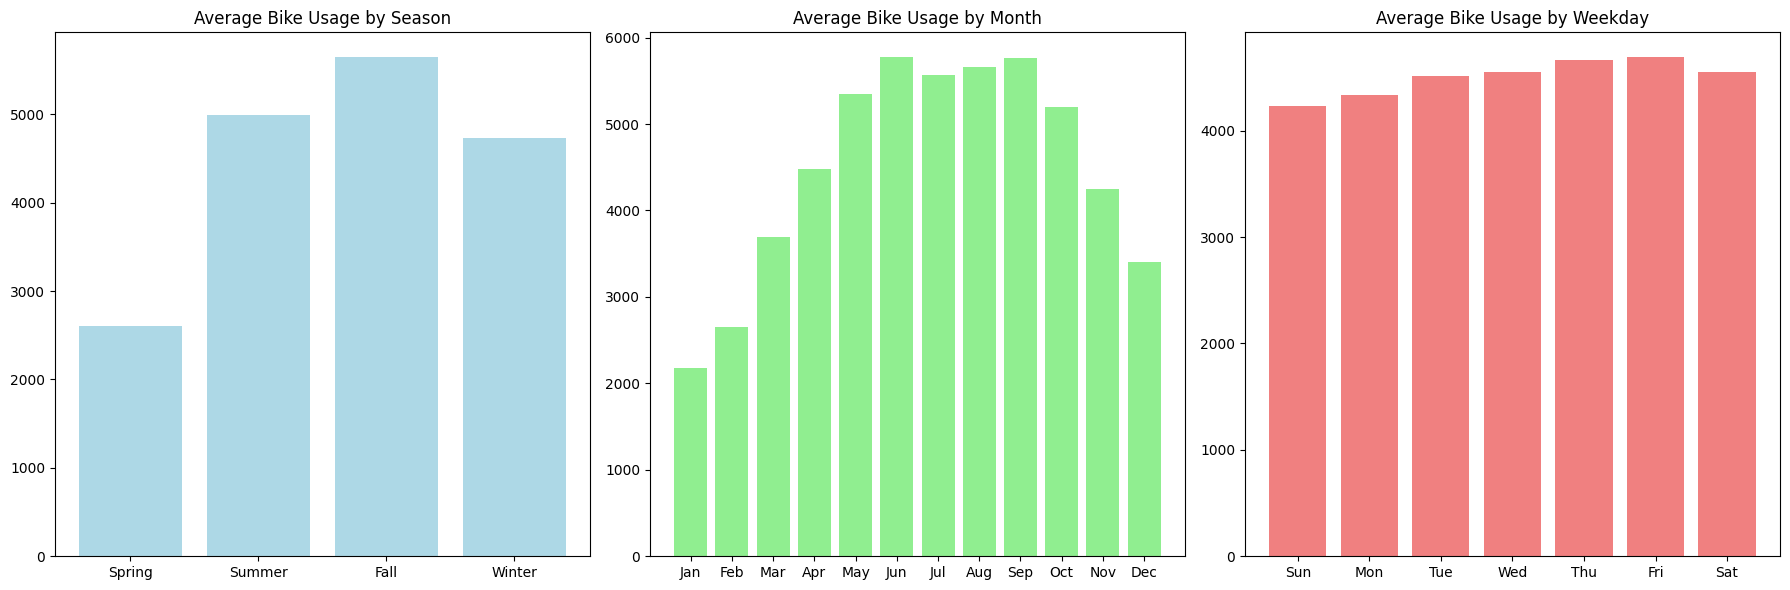

In [25]:
# Group by season, month, and weekday to observe trends
season_trend = day_data.groupby('season')['cnt'].mean()
month_trend = day_data.groupby('mnth')['cnt'].mean()
weekday_trend = day_data.groupby('weekday')['cnt'].mean()

# Plot the trends
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Season Trend
axes[0].bar(season_trend.index, season_trend.values, color='lightblue')
axes[0].set_title('Average Bike Usage by Season')
axes[0].set_xticks([1, 2, 3, 4])
axes[0].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])

# Month Trend
axes[1].bar(month_trend.index, month_trend.values, color='lightgreen')
axes[1].set_title('Average Bike Usage by Month')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Weekday Trend
axes[2].bar(weekday_trend.index, weekday_trend.values, color='lightcoral')
axes[2].set_title('Average Bike Usage by Weekday')
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

plt.tight_layout()
plt.show()

**Insight:**
- Suhu (temp) memiliki pengaruh positif yang signifikan terhadap jumlah pengguna sepeda (coef: 6625.53), artinya ketika suhu meningkat, penggunaan sepeda cenderung meningkat.
- Kelembapan (hum) dan kecepatan angin (windspeed) menunjukkan pengaruh negatif yang signifikan terhadap penggunaan sepeda.
- Penggunaan Sepeda Berdasarkan Musim: Penggunaan tertinggi terjadi pada musim panas (Summer) dan terendah pada musim dingin (Winter).
- Penggunaan Sepeda Berdasarkan Bulan: Bulan Juli dan Agustus memiliki penggunaan tertinggi, sedangkan Desember dan Januari terendah.
- Penggunaan Sepeda Berdasarkan Hari: Penggunaan lebih tinggi pada akhir pekan (Sabtu khususnya) dibandingkan hari kerja.

## Analisis Lanjutan (Opsional)

In [26]:
# Prepare additional features for regression
X_extended = day_data[['temp', 'hum', 'windspeed', 'weathersit', 'workingday', 'holiday']]
y_extended = day_data['cnt']

# Add a constant (intercept) to the model
X_extended = sm.add_constant(X_extended)

# Fit the extended regression model
model_extended = sm.OLS(y_extended, X_extended).fit()

# Print the summary of the extended regression model
print(model_extended.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           4.90e-98
Time:                        03:16:46   Log-Likelihood:                -6333.7
No. Observations:                 731   AIC:                         1.268e+04
Df Residuals:                     724   BIC:                         1.271e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3971.8785    343.065     11.578      0.0

**Insight**
- Suhu (temp) masih menjadi faktor yang paling signifikan, dengan pengaruh positif terhadap jumlah pengguna sepeda.
- Kondisi cuaca (weathersit) berpengaruh negatif: saat cuaca lebih buruk (misalnya hujan atau mendung), penggunaan sepeda menurun secara signifikan.
- Hari kerja (workingday) menunjukkan korelasi positif, mengindikasikan bahwa lebih banyak pengguna sepeda pada hari kerja dibandingkan akhir pekan.
- Hari libur (holiday) memiliki dampak kecil namun negatif, menandakan bahwa penggunaan sepeda sedikit menurun pada hari libur.

In [27]:
# Features and target
X_hour = hour_data[['temp', 'hum', 'windspeed', 'weathersit', 'hr']]
y_hour = hour_data['cnt']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hour, y_hour, test_size=0.3, random_state=42)

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 21033.057440327917
R-squared: 0.33420393600090703


**Insight**
- Suhu kembali menjadi variabel yang paling kuat dalam memprediksi jumlah pengguna sepeda per jam.
- Kelembapan dan kecepatan angin berpengaruh negatif, yang berarti cuaca buruk mengurangi aktivitas bersepeda.
- Jam dalam sehari (hr) menunjukkan pola yang menarik, di mana jam-jam sibuk seperti pagi (waktu kerja) dan sore (pulang kerja) cenderung memiliki lebih - banyak pengguna sepeda.
- Evaluasi model menggunakan metrik Mean Squared Error (MSE) dan R-squared memberikan gambaran seberapa baik model ini memprediksi data.

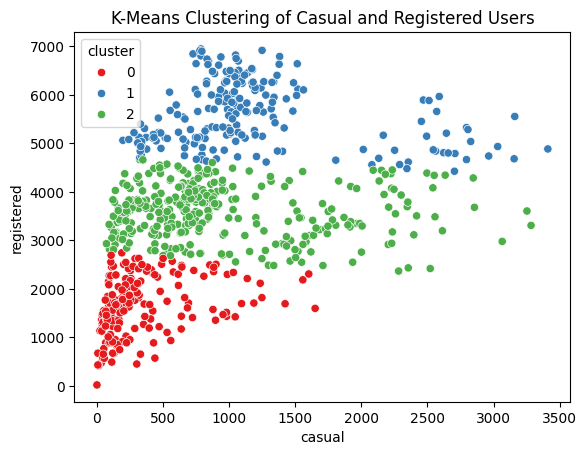

In [28]:
# Using casual and registered user data to create clusters
X_cluster = day_data[['casual', 'registered']]

# Create KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
day_data['cluster'] = kmeans.fit_predict(X_cluster)

# Visualizing the clusters
sns.scatterplot(x='casual', y='registered', hue='cluster', data=day_data, palette='Set1')
plt.title('K-Means Clustering of Casual and Registered Users')
plt.show()

**Insight**
- Hasil clustering menunjukkan bahwa ada kelompok pengguna kasual yang cenderung menggunakan sepeda lebih banyak pada akhir pekan atau hari libur, dan kelompok pengguna terdaftar yang menggunakan sepeda secara konsisten selama hari kerja.
- Salah satu klaster bisa mewakili pengguna dengan volume tinggi, yang sering menggunakan sepeda pada jam-jam sibuk selama hari kerja, seperti komuter harian.
- Klaster lainnya bisa mewakili pengguna kasual, yang lebih aktif pada hari-hari tertentu seperti akhir pekan atau pada saat cuaca lebih baik.

## Conclusion

**Faktor apa yang paling berpengaruh terhadap jumlah pengguna sepeda?**
- Kesimpulan utamanya adalah suhu memiliki pengaruh terbesar dalam meningkatkan jumlah pengguna sepeda, sementara kelembapan, kecepatan angin, dan kondisi cuaca buruk menurunkan penggunaan sepeda.

**Bagaimana tren penggunaan sepeda bervariasi berdasarkan waktu (seperti musim, bulan, hari dalam seminggu, dan jam)?**
- Kesimpulan dari pertanyaan ini adalah bahwa waktu dalam setahun dan hari dalam minggu sangat mempengaruhi jumlah pengguna sepeda. Penggunaan paling banyak terjadi pada bulan-bulan musim panas dan akhir pekan, dengan puncak penggunaan pada jam-jam sibuk di hari kerja.